<a href="https://colab.research.google.com/github/stephyi/Machine-Learning-Tutorials/blob/master/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [12]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [14]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'sales Price distribution')

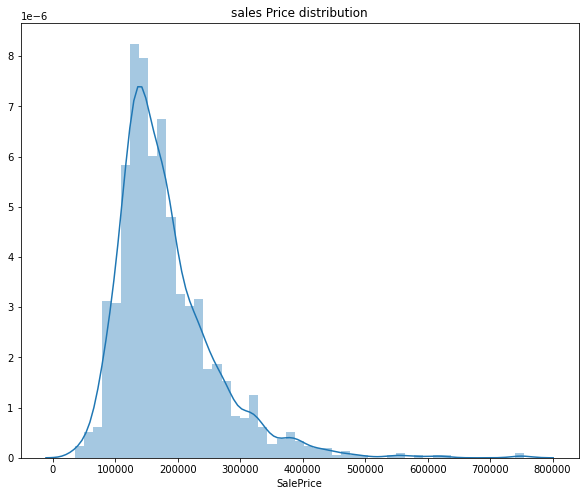

In [17]:
import seaborn as sns

fig=plt.figure(figsize=(10,8))
sns.distplot(train['SalePrice'])
plt.title('sales Price distribution')

**Skewness**-Used to mean the abscence of symmetry from the mean of the dataset.Skewness is used to indicate the shape of the distribution of data.In skewed distribution,the curve is extended to either left or right side.In skewed distribution, the plot is extended to either left or right side.When plot is extended towards the right side more,it denotes positive skewness.When plot is stretched more towards the left direction,then it is called negative skewness.

**Kurtosis**-it is the parameter of relative sharpness of the peak of the probability distribution curve.It is used to indicate the flatness or peakness of the frequency distribution curve and measures the tails or outliers of the distribution.Positive kurtosis represents that the distribution is more peaked than the normal distribution,whereas negative kurtosis shoes that the distribution is less peaked than the normal distribution

In [19]:
#Skewness and Kurtosis
print('Skewness: %f' %train['SalePrice'].skew())
print('Kurtosis: %f' %train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Use np.log() to transform train.salePrice and calculate the skewness and kurtosis again.

In [20]:
target=np.log(train.SalePrice)
print('Skewness: %f' % target.skew())
print('Kurtosis: %f' % target.kurt())

Skewness: 0.121335
Kurtosis: 0.809532


Working with numeric features

In [21]:
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [22]:
print(train.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                   min       max           mean
BsmtHalfBath       0.0       2.0       0.057534
HalfBath           0.0       2.0       0.382877
FullBath           0.0       3.0       1.565068
KitchenAbvGr       0.0       3.0       1.046575
BsmtFullBath       0.0       3.0       0.425342
Fireplaces         0.0       3.0       0.613014
GarageCars         0.0       4.0       1.767123
BedroomAbvGr       0.0       8.0       2.866438
OverallCond        1.0       9.0       5.575342
OverallQual        1.0      10.0       6.099315
MoSold             1.0      12.0       6.321918
TotRmsAbvGrd       2.0      14.0       6.517808
MSSubClass        20.0     190.0      56.897260
LotFrontage       21.0     313.0      70.049958
ScreenPorch        0.0     480.0      15.060959
3SsnPorch          0.0     508.0       3.409589
OpenPorchSF        0.0     547.0      46.660274
EnclosedPorch      0.0     552.0      21.954110
LowQualFinSF       0.0     572.0       5.844521
PoolArea           0.0     738.0       2

In [23]:
corr=numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


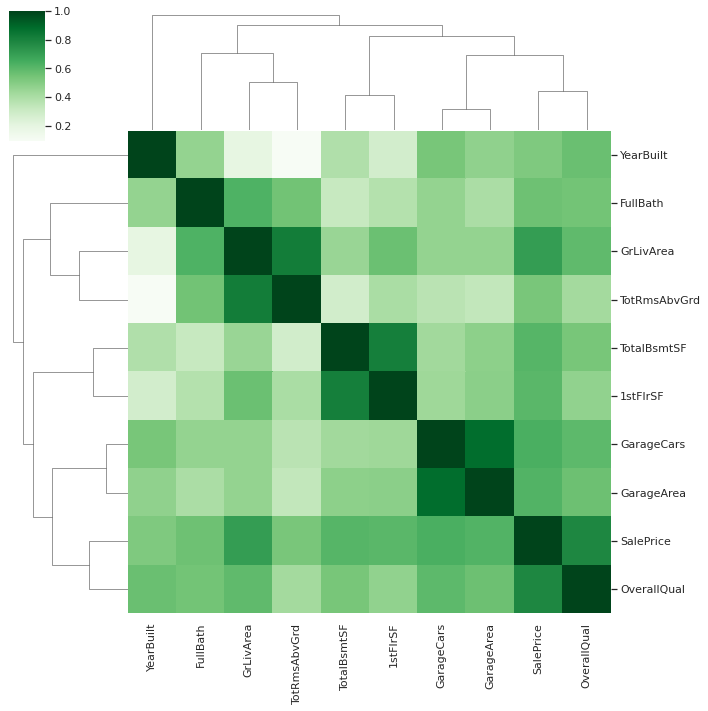

In [24]:
# SalePrice Correlation Matrix
k=10
cols=corr.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.00)
hm=sns.clustermap(cm,cmap='Greens',cbar=True,square=True,yticklabels=cols.values,xticklabels=cols.values)

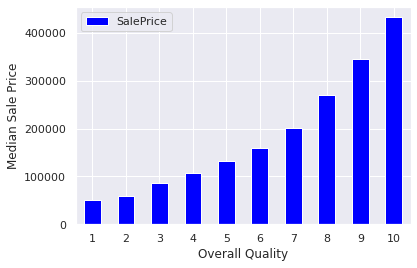

In [34]:
quality_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

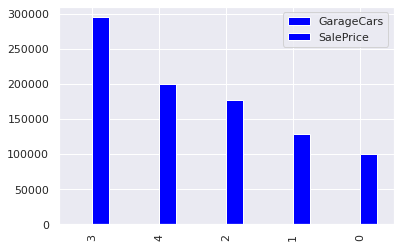

In [42]:
garage_cars=train.groupby('GarageCars').agg({'SalePrice':'median'}).reset_index(False).sort_values('SalePrice',ascending=False)
garage_cars.plot(kind='bar',color='blue')
plt.show()

In [45]:
garage_car=train.pivot_table(index='GarageCars',values='SalePrice',aggfunc=np.median)
garage_car

,SalePrice
GarageCars,
0,100000
1,128000
2,177750
3,295000
4,200000


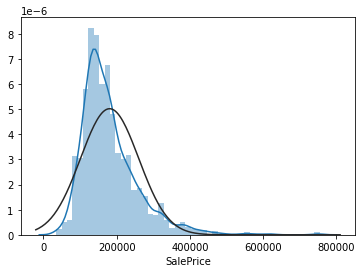

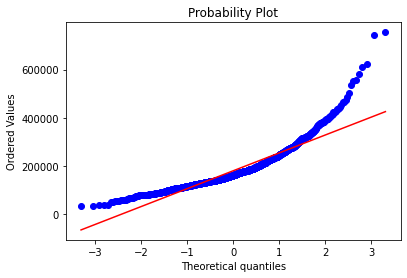

In [4]:
#Histogram and normal probability plot
sns.distplot(train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)

In [9]:
## Missing Data
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**NON-NUMERIC FEATURES**

In [11]:
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [23]:
for c in categoricals.columns:
  #print("Column Name",train[c])
  print('{:14}'.format(c), train[c].unique())

MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street         ['Pave' 'Grvl']
Alley          [nan 'Grvl' 'Pave']
LotShape       ['Reg' 'IR1' 'IR2' 'IR3']
LandContour    ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities      ['AllPub' 'NoSeWa']
LotConfig      ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope      ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle      ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl       ['CompShg' 'WdShngl' 'Metal' 'Wd

**LABEL-ENCODING**

In [25]:
from sklearn.preprocessing import LabelEncoder
for c in categoricals.columns:
  lb=LabelEncoder()
  lb.fit(list(train[c].values))
  train[c]=lb.transform(list(train[c].values))
  
  lb.fit(list(test[c].values))
  test[c]=lb.transform(list(test[c].values))

**OUTLIERS**

(1445, 81)
(1445, 81)


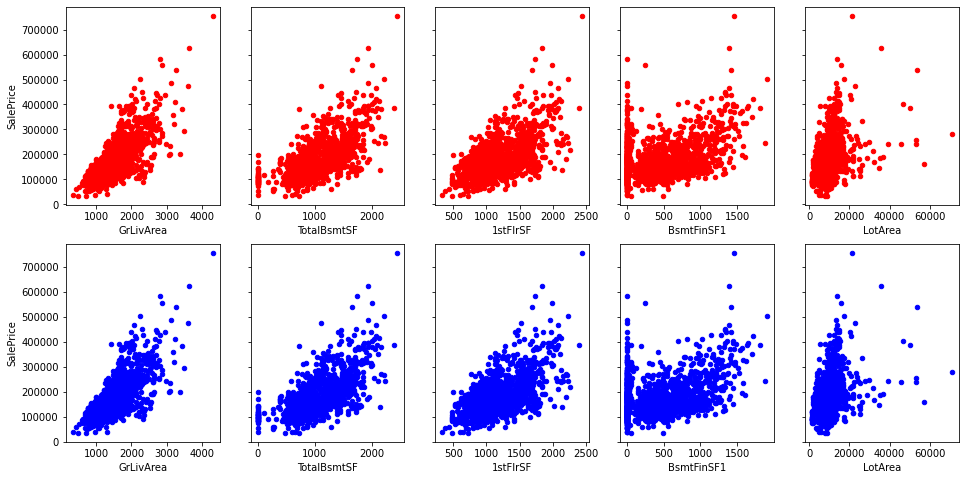

In [31]:
fig , axes=plt.subplots(ncols=5, nrows=2 ,figsize=(16,8))
axes=np.ravel(axes)
col_names=['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']

for i,c in zip(range(5),col_names):
  train.plot.scatter(ax=axes[i],x=c,y='SalePrice',sharey=True,colorbar=False,c='r')

#delete outliers
print(train.shape)
train = train[train['GrLivArea']< 4500]
train = train[train['LotArea']< 100000]
train = train[train['TotalBsmtSF']< 3000]
train = train[train['1stFlrSF']< 2500]
train = train[train['BsmtFinSF1']< 2000]

print(train.shape)

for i,c in zip(range(5,10),col_names):
  train.plot.scatter(ax=axes[i],x=c,y='SalePrice',sharey=True,colorbar=False,c='b')


In [32]:
#Deleting dominating features over 97%

In [34]:
train=train.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolQC'])
test=test.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolQC'])

**MISSING DATA**

In [37]:
##Removing Missing Columns-->We'll remove any columns with more than 70%  missing values in either the traning or test set
train=train.select_dtypes(include=[np.number])

train=train.dropna(thresh=0.70*len(train),axis=1)
test=test.dropna(thresh=0.70*len(test),axis=1)

In [39]:
train=train.fillna(train.mean())
test=test.fillna(test.mean())

In [43]:
train.shape

(1445, 75)

In [47]:
train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,2,3,3,4,0,5,2,0,5,7,5,2003,2003,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,2,3,3,2,0,24,1,0,2,6,8,1976,1976,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,2,0,3,4,0,5,2,0,5,7,5,2001,2002,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,2,0,3,0,0,6,2,0,5,7,5,1915,1970,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,4,4,0,2,2006,8,0,140000


In [48]:
y=np.log(train.SalePrice)
X=train.drop(['SalePrice','Id'],axis=1)

**REMOVE COLLINEAR VARIABLES**
* These are variables that are highly correlated with one another.

In [53]:
##Threshold for removing correlated variables
threshold= 0.8

#Absolute value correlation matrix
corr_matrix=X.corr().abs()

#Upper triangle of correlations
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#Select columns with correlations above threshold
to_drop=[column for column in upper.columns if any(upper[column]>threshold)]

X=X.drop(columns=to_drop)



In [54]:
print(X.shape)
print(y.shape)

(1445, 70)
(1445,)


In [72]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

def identify_zero_importance_features(X,y,iterations=2):
      """
        Identify zero importance features in a training dataset based on the feature importances from a gradient boosting model.

        Parameters
        ----------
        train: dataframe
            Training Features

        train_labels:np.array
            labels for training data

        iterations: integer,default=2
            Number of cross validation splits to use to determine feature importances
      """
      #Initialize an empty array to hold feature_importance
      feature_importances=np.zeros(X.shape[1])

      #Create the model with several hyperparameters
      model=LGBMRegressor(objective='regression',
                            num_leaves=4,
                            learning_rate=0.05,
                            max_bin=75,
                            bagging_fraction=0.8,
                            bagging_freq=9,
                            feature_fraction=0.45,
                            feature_fraction_seed=9,
                            bagging_seed=12,
                            min_data_in_leaf=3,
                            min_sum_hessian_in_leaf=2)
        

      #Fit the model multiple times to avoid overfitting
      for i in range(iterations):
          #Split into training and validation set
          train_features,valid_features,train_y,valid_y=train_test_split(X,y,test_size=0.25,random_state=1)

          #Train using early stopping
          model.fit(train_features,train_y,early_stopping_rounds=100,eval_set=[(valid_features,valid_y)])

          #Record the feature importances
          feature_importances+=model.feature_importances_/iterations

      feature_importances=pd.DataFrame({'feature':list(X.columns),'importance':feature_importances}).sort_values(by='importance',ascending=False)

      #Find the features with zero importance
      zero_features=list(feature_importances[feature_importances['importance']== 0.0]['feature'])
      print('\n There are %d features with 0.0 importance' %len(zero_features))

      return zero_features,feature_importances

zero_features, feature_importances= identify_zero_importance_features(X,y,iterations=2)
print('zero_features',zero_features)
print('feature_importances:', feature_importances)


[1]	valid_0's l2: 0.143814
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 0.135978
[3]	valid_0's l2: 0.127584
[4]	valid_0's l2: 0.120289
[5]	valid_0's l2: 0.113978
[6]	valid_0's l2: 0.108239
[7]	valid_0's l2: 0.10328
[8]	valid_0's l2: 0.0978202
[9]	valid_0's l2: 0.0930189
[10]	valid_0's l2: 0.0887263
[11]	valid_0's l2: 0.0842317
[12]	valid_0's l2: 0.0800752
[13]	valid_0's l2: 0.0763197
[14]	valid_0's l2: 0.0733612
[15]	valid_0's l2: 0.0702206
[16]	valid_0's l2: 0.0670891
[17]	valid_0's l2: 0.0642017
[18]	valid_0's l2: 0.0617393
[19]	valid_0's l2: 0.059314
[20]	valid_0's l2: 0.0571374
[21]	valid_0's l2: 0.0552766
[22]	valid_0's l2: 0.0534611
[23]	valid_0's l2: 0.0515064
[24]	valid_0's l2: 0.0499081
[25]	valid_0's l2: 0.0481363
[26]	valid_0's l2: 0.0466977
[27]	valid_0's l2: 0.0451315
[28]	valid_0's l2: 0.0436771
[29]	valid_0's l2: 0.0422671
[30]	valid_0's l2: 0.0410747
[31]	valid_0's l2: 0.0399488
[32]	valid_0's l2: 0.0387442
[33]	valid_0's l2: 0.037724

In [73]:
feature_importances.describe()

,importance
count,70.000000
mean,4.285714
std,8.070599
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,47.000000


In [74]:
zero_features

['MoSold',
 'MiscVal',
 'Alley',
 'MiscFeature',
 'SaleType',
 'GarageCond',
 'PoolArea',
 'LotShape',
 '3SsnPorch',
 'EnclosedPorch',
 'LandContour',
 'LotConfig',
 'PavedDrive',
 'Fence',
 'HeatingQC',
 'LandSlope',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'KitchenAbvGr',
 'Foundation',
 'BsmtHalfBath',
 'BsmtFinType2',
 'BsmtFinSF2',
 'LowQualFinSF',
 'MSSubClass']

In [ ]:
#X=X.drop(zero_features,axis=1)
#test=test.drop(zero_features,axis=1)

**Drop Columns having features importance less than 20%**

In [76]:
pp=np.percentile(feature_importances['importance'],20)
print(pp)

0.0


In [77]:
to_drop=feature_importances[feature_importances['importance']<=pp]['feature']
X=X.drop(columns=to_drop)

In [78]:
print(X.shape)
print(y.shape)

(1445, 40)
(1445,)


In [81]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**LINEAR REGRESSION**

In [82]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model using the training sets
regr.fit(X_train,y_train)

#make predictions using the testing set
y_pred=regr.predict(X_test)

print('The accuracy o the linear regression is:',r2_score(y_test,y_pred))
print('RSME is \n',mean_squared_error(y_test,y_pred))

The accuracy o the linear regression is: 0.9103887403459598
RSME is 
 0.012975212340691145


**XGBOOST REGRESSOR**

In [88]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(learning_rate =0.01, n_estimators=5580, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:squarederror',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006)

xg_reg.fit(X_train,y_train)

preds=xg_reg.predict(X_test)

print('The accuracy of xgboost is',r2_score(y_test,preds))
print('RSME is : \n',mean_squared_error(y_test,preds))

The accuracy of xgboost is 0.9128261255686689
RSME is : 
 0.012622292507370993


**GRADIENT BOOSTING REGRESSOR**

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model=GradientBoostingRegressor(n_estimators=4780,learning_rate=0.01,
                                    max_depth=10,max_features='sqrt',
                                    min_samples_leaf=1,min_samples_split=250,
                                    loss='huber',random_state=6)
gbr_model.fit(X_train,y_train)

gbr_preds=gbr_model.predict(X_test)

print('the accuracy of the Gradient boost is',r2_score(y_test,gbr_preds))
print('RSME is :/n',mean_squared_error(y_test,gbr_preds))

the accuracy of the Gradient boost is 0.920181280165992
RSME is :/n 0.011557307001449971


**RIDGE CV**

In [95]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

r_alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]

ridge_model=make_pipeline(RobustScaler(),RidgeCV(alphas=r_alphas,cv=3)).fit(X_train,y_train)

ridge_preds=ridge_model.predict(X_test)
print('The accuracy of the ridge CV is',r2_score(y_test,ridge_preds))
print("RSME is \n:",mean_squared_error(y_test,ridge_preds))

The accuracy of the ridge CV is 0.9100993307175506
RSME is 
: 0.013017117246353092


**LASSO CV**

In [96]:
from sklearn.linear_model import LassoCV

alpha_lasso = np.logspace(-3, -1, 30)


lasso_model = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e6,
                                    alphas = alpha_lasso,
                                    random_state = 1)).fit(X_train, y_train)

lasso_preds = lasso_model.predict(X_test)
print('The accuracy of the lasso Regressor is',r2_score(y_test,lasso_preds))
print ('RMSE is: \n', mean_squared_error(y_test,lasso_preds))

The accuracy of the lasso Regressor is 0.9104856605294317
RMSE is: 
 0.012961178836804454


**ELASTIC NET CV**

In [97]:
from sklearn.linear_model import ElasticNetCV

e_alphas = np.logspace(-3 -2, 30)

e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_model= make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e6, alphas=e_alphas, 
                                         l1_ratio=e_l1ratio)).fit(X_train, y_train)

elastic_preds = elastic_model.predict(X_test)
print('The accuracy of the  Elastic Net CV is',r2_score(y_test,elastic_preds))
print ('RMSE is: \n', mean_squared_error(y_test,elastic_preds))

The accuracy of the  Elastic Net CV is 0.9104919922999561
RMSE is: 
 0.012960262031624339


In [99]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

#setup models

ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=r_alphas))
lasso=make_pipeline(RobustScaler(),LassoCV(max_iter=1e6,alphas=alpha_lasso,random_state=1)).fit(X_train,y_train)

elasticnet=make_pipeline(RobustScaler(),ElasticNetCV(max_iter=1e6,alphas=e_alphas,l1_ratio=e_l1ratio)).fit(X_train,y_train)

lgbm_model=LGBMRegressor(objective='regression',
                              num_leaves=4,
                              learning_rate=0.05, 
                              n_estimators=1250,
                              max_bin=75, 
                              bagging_fraction=0.8,
                              bagging_freq=9, 
                              feature_fraction=0.45,
                              feature_fraction_seed=9, 
                              bagging_seed=12,
                              min_data_in_leaf=3, 
                              min_sum_hessian_in_leaf=2).fit(X_train,y_train)

gbr_model = GradientBoostingRegressor(n_estimators=4780, learning_rate=0.01,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=1, min_samples_split=250, 
                                   loss='huber', random_state =6).fit(X_train,y_train)


#Stack
stack_gen=StackingCVRegressor(regressors=(ridge,lasso,elasticnet,gbr_model,lgbm_model),meta_regressor=gbr_model,use_features_in_secondary=True)

#Prepare Dataframes
stackX = np.array(X_train)
stacky = np.array(y_train)
stack_gen_model = stack_gen.fit(stackX,stacky)

In [100]:
em_preds = elastic_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)
stack_gen_preds = stack_gen_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)
gbr_preds = gbr_model.predict(X_test)

In [101]:
print ('RMSE is: \n', mean_squared_error(y_test,stack_gen_preds))
print('The accuracy of the stack is',r2_score(y_test,stack_gen_preds))

RMSE is: 
 0.011874565867106007
The accuracy of the stack is 0.9179901817977063


In [ ]:
#feats = test.select_dtypes(include=[np.number]).interpolate().dropna()
feats = test.drop(['Id'], axis=1)

feats = feats[X_train.columns]
lasso_preds = lasso_model.predict(feats)
em_preds = elastic_model.predict(feats)
ridge_preds = ridge_model.predict(feats)
stack_gen_preds = stack_gen_model.predict(feats)
lgbm_preds = lgbm_model.predict(feats)
gbr_preds = gbr_model.predict(feats)
stack_preds = ((0.1*em_preds) + (0.1*lasso_preds) + (0.1*ridge_preds) +(0.1 * gbr_preds ) 
               + (0.1*lgbm_preds) + (0.5*stack_gen_preds) )
#predictions = model.predict(feats)
final_predictions = np.exp(stack_preds)
print ("Original predictions are: \n", stack_preds[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = final_predictions 
submission.to_csv('submission1.csv', index=False)